# Exploration of y and submissions

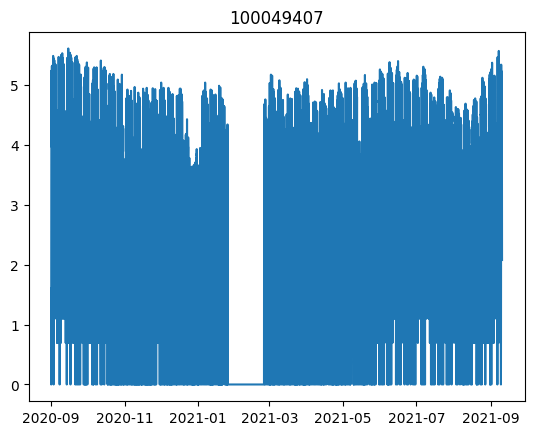

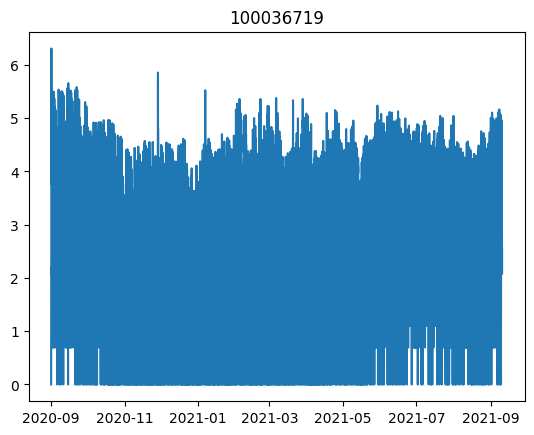

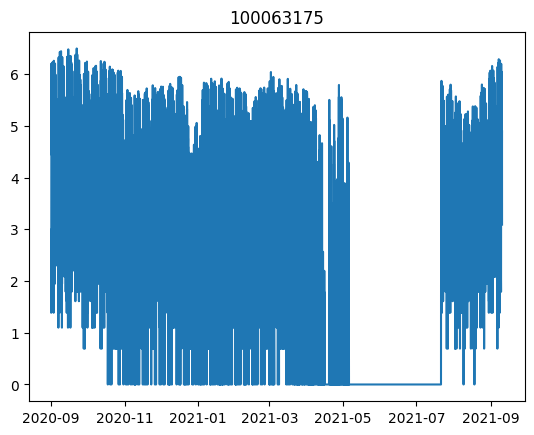

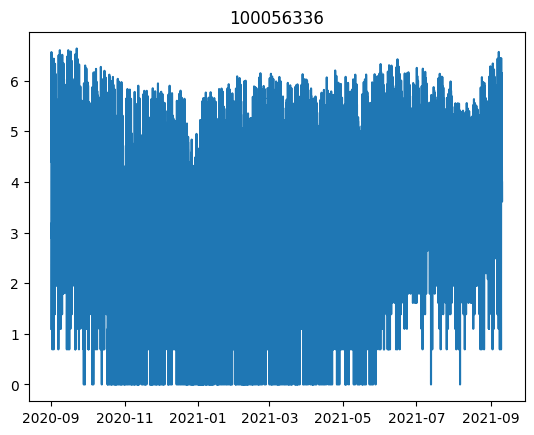

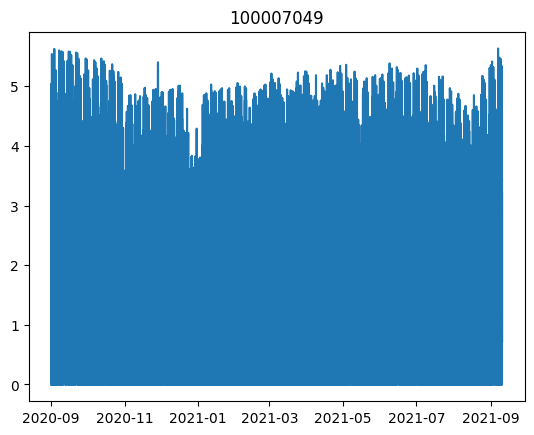

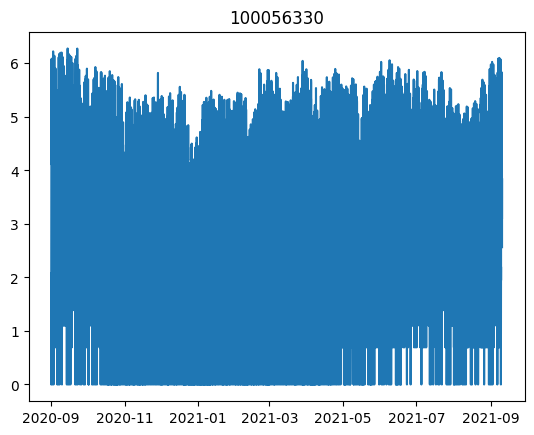

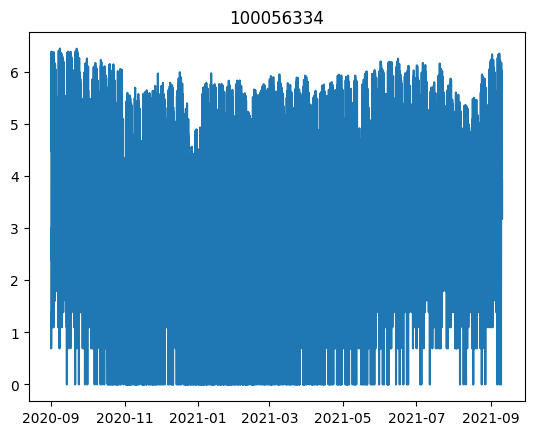

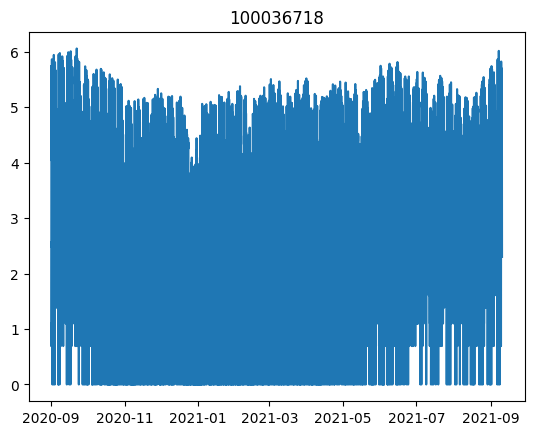

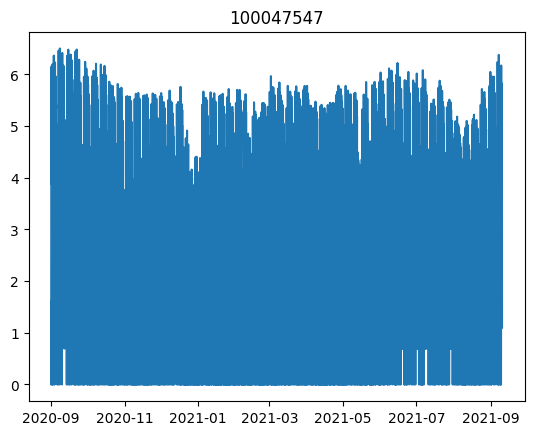

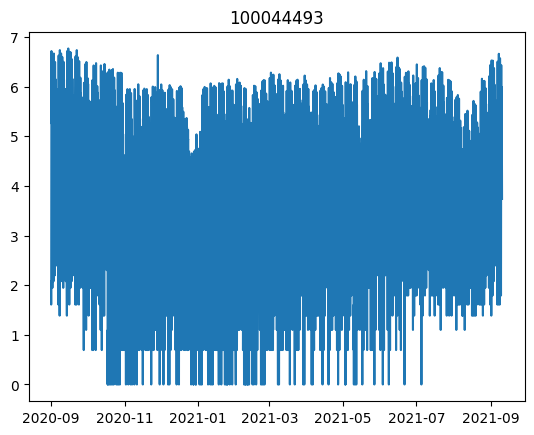

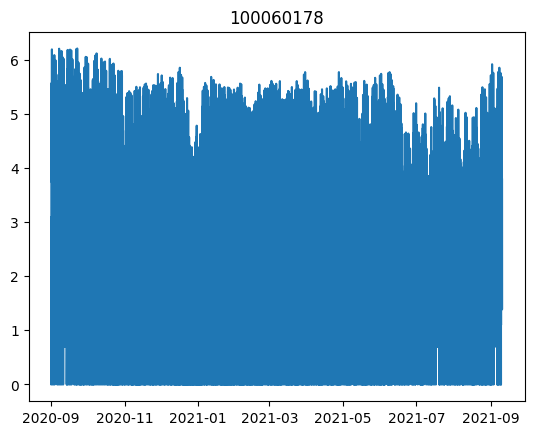

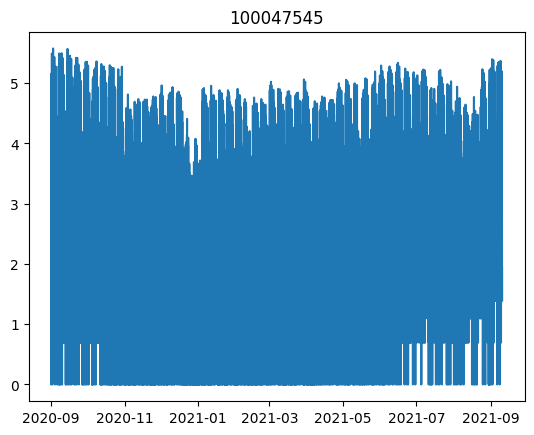

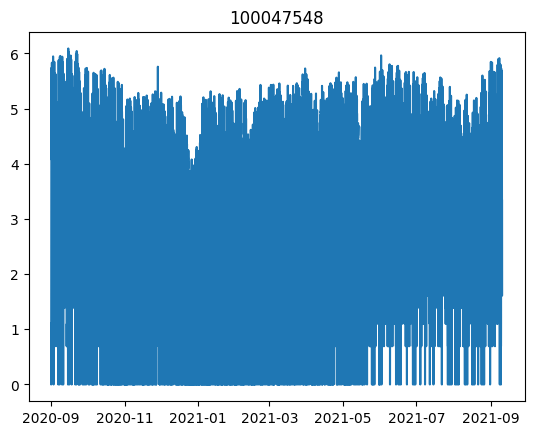

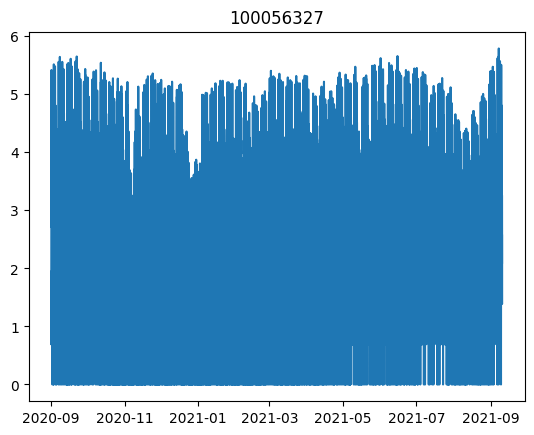

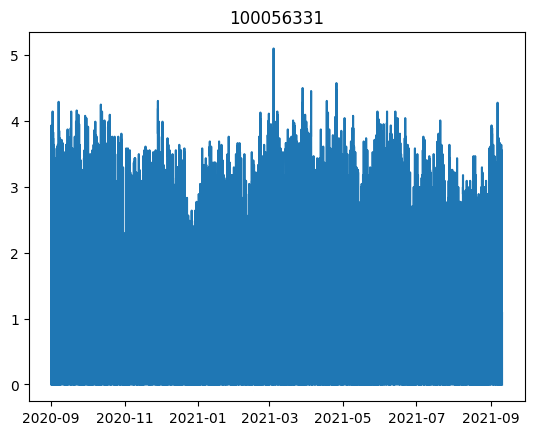

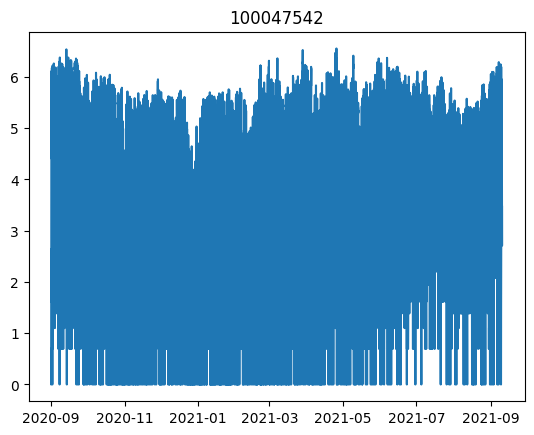

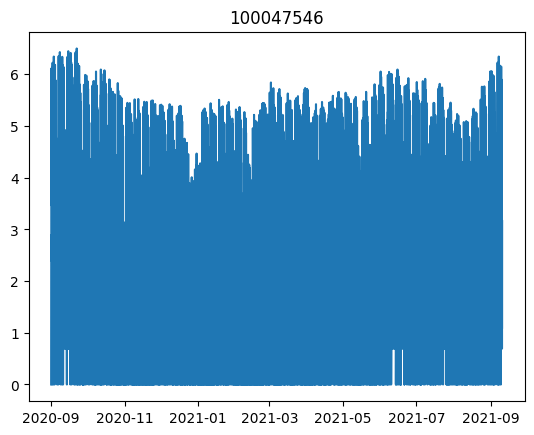

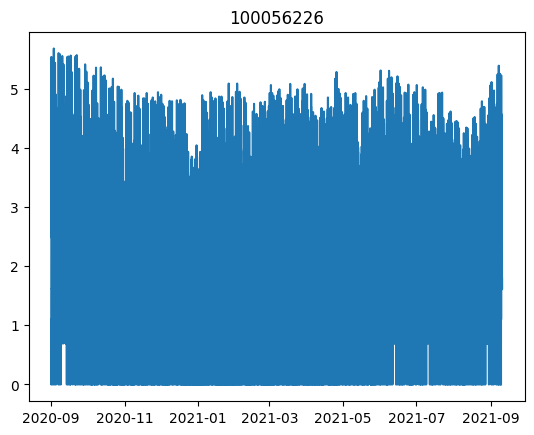

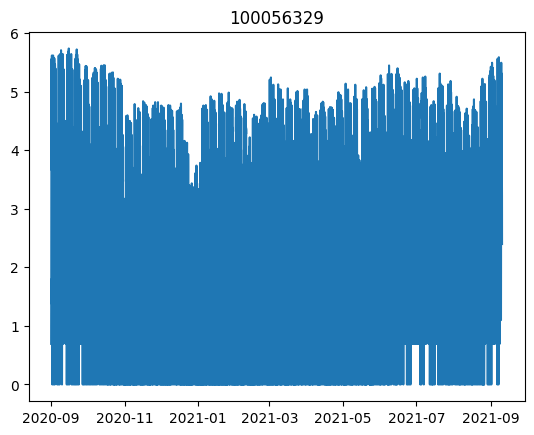

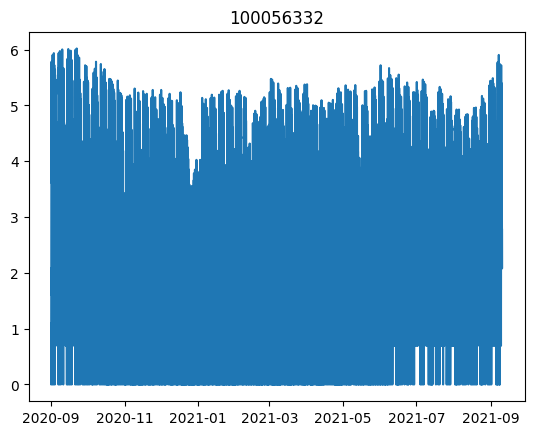

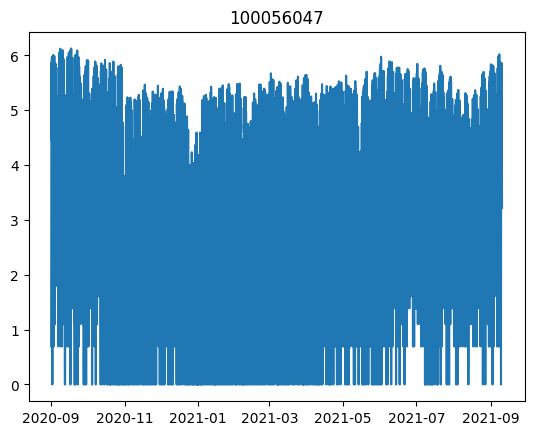

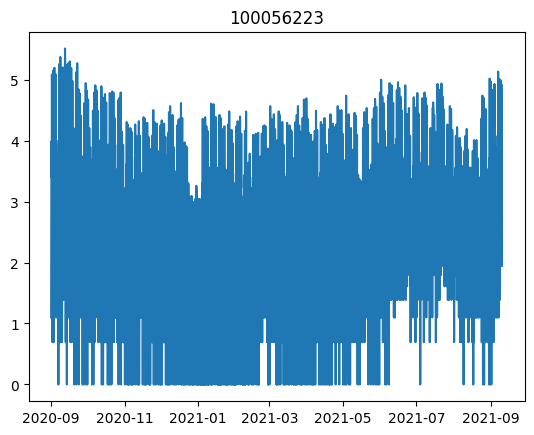

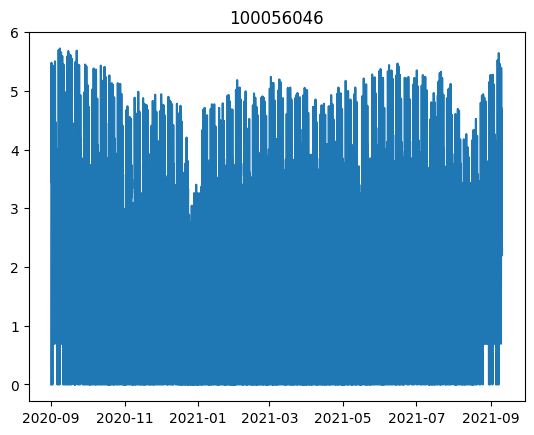

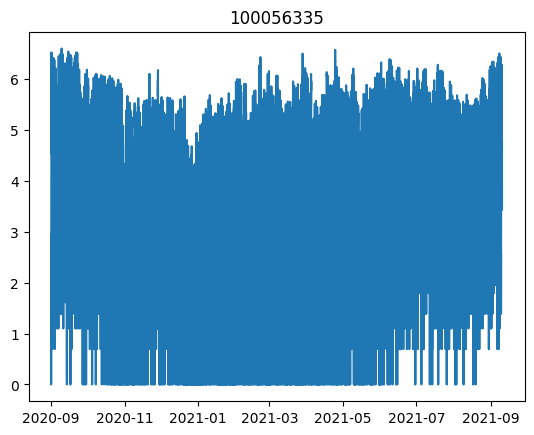

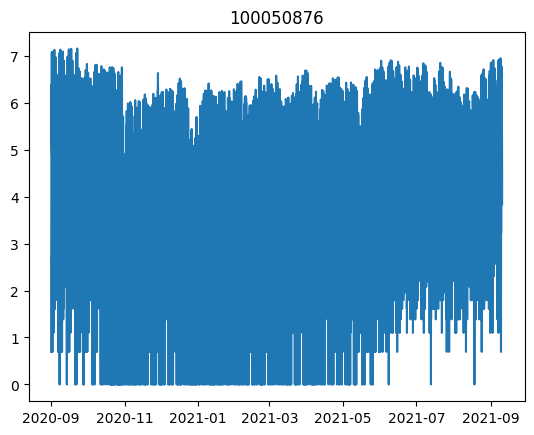

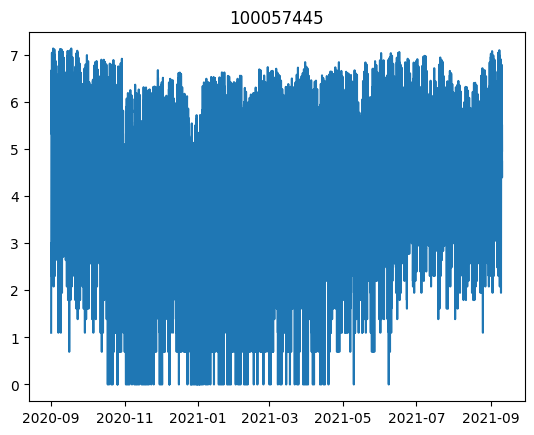

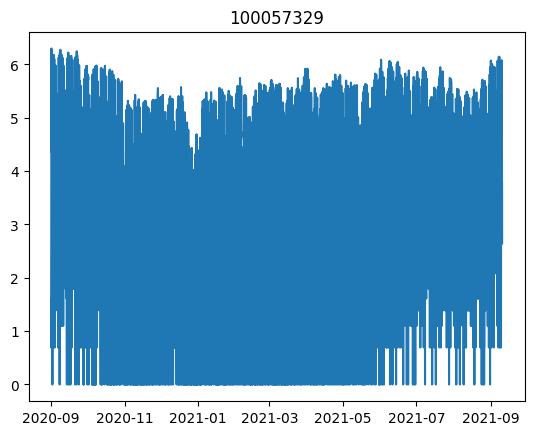

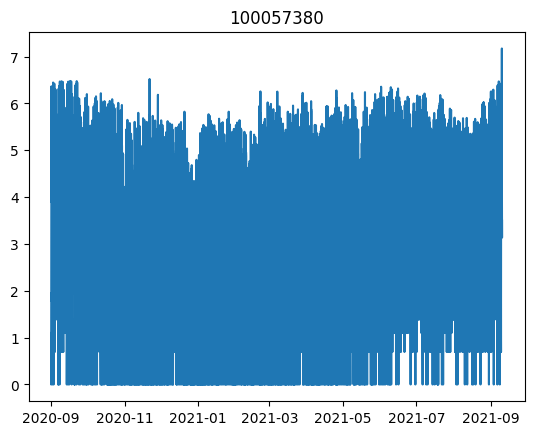

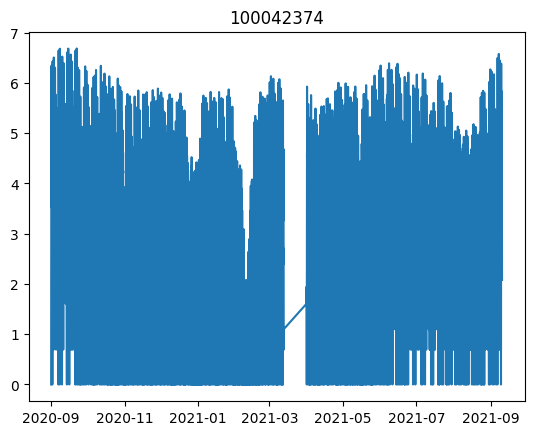

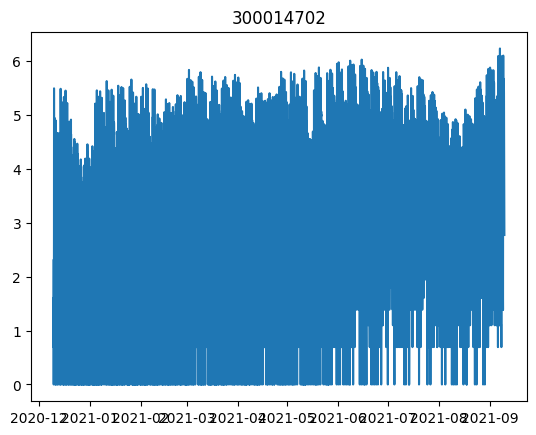

In [33]:
import utils
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

X, y = utils.get_train_data()
site_ids = X['site_id'].unique()

for elem in site_ids:
    plt.plot(X['date'][X['site_id']==elem], y[X['site_id']==elem])
    plt.title(f"{elem}")
    plt.show()

We notice 3 counters that were broken for a moment during the period.

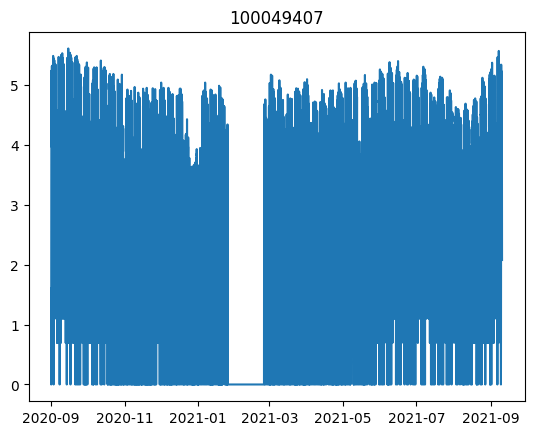

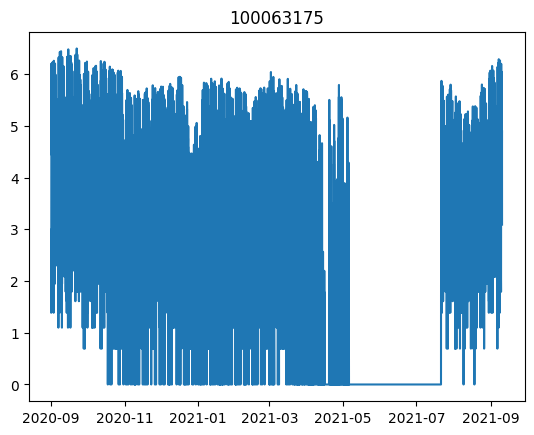

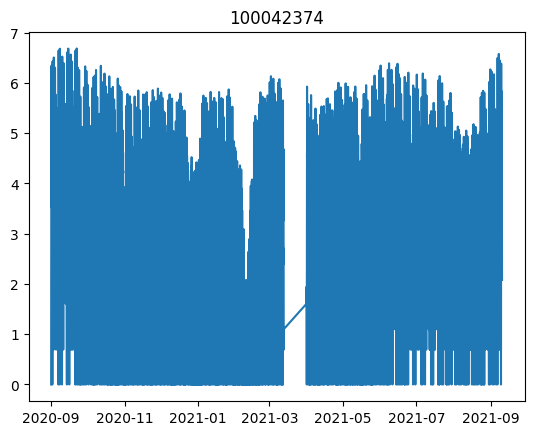

In [34]:
site_ids_broken = [100049407, 100063175, 100042374]
for elem in site_ids_broken:
    plt.plot(X['date'][X['site_id']==elem], y[X['site_id']==elem])
    plt.title(f"{elem}")
    plt.show()

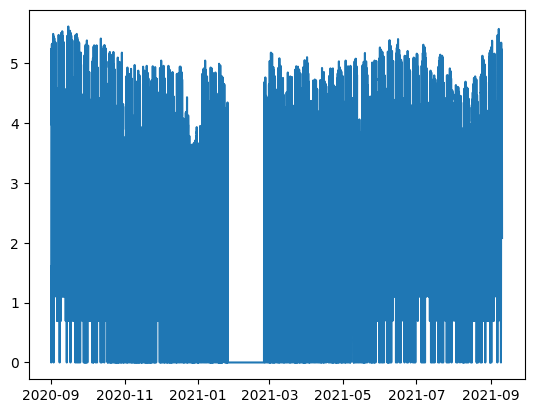

In [36]:
plt.plot(X['date'][X['site_id']==100049407], y[X['site_id']==100049407])

Text(0.5, 1.0, '100049407')

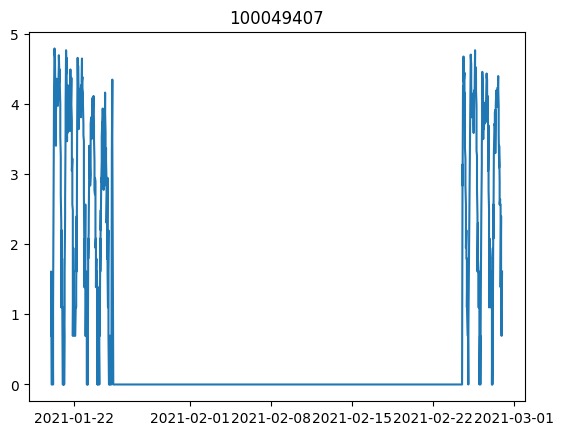

In [39]:
start_date = pd.to_datetime("2021-01-20")
end_date  = pd.to_datetime("2021-02-28")

mask = (X['site_id'] == 100049407) & (X['date'] >= start_date) & (X['date'] <= end_date)

# Tracer le graphique
plt.plot(X['date'][mask], y[mask])
plt.title('100049407')

Text(0.5, 1.0, '100063175')

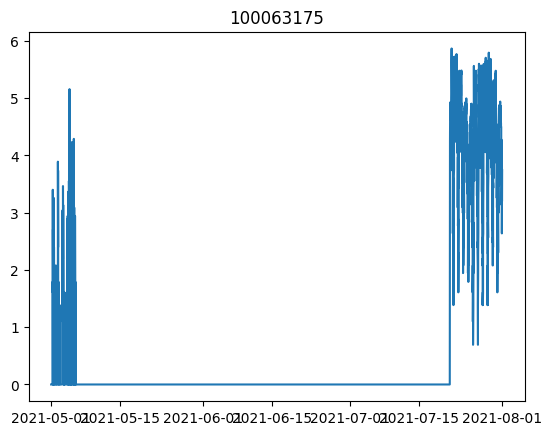

In [40]:
start_date = pd.to_datetime("2021-05-01")
end_date  = pd.to_datetime("2021-08-01")

mask = (X['site_id'] == 100063175) & (X['date'] >= start_date) & (X['date'] <= end_date)

# Tracer le graphique
plt.plot(X['date'][mask], y[mask])
plt.title('100063175')

Text(0.5, 1.0, '100042374')

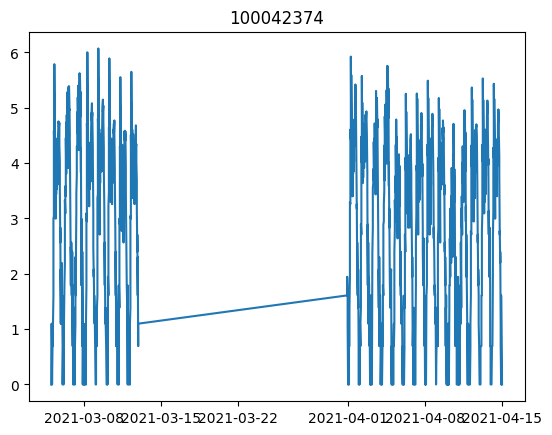

In [41]:
start_date = pd.to_datetime("2021-03-05")
end_date  = pd.to_datetime("2021-04-15")

mask = (X['site_id'] == 100042374) & (X['date'] >= start_date) & (X['date'] <= end_date)

# Tracer le graphique
plt.plot(X['date'][mask], y[mask])
plt.title('100042374')

In [44]:
from datetime import datetime
X['date'].dt.hour.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int32)

In [46]:
from feature_eng_adrien import feature_test_adrien
df_ext = pd.read_csv("./external_data/external_data.csv")
col_ext = ["date", 
           "t", # temperature, obvious factor
           "cl", # cloud covering
           "tend24", #weather tendency on 24h
           "etat_sol", # state of the floor
           "rr3", # rain during the last 3 hours
           "w1",
           "nbas",
           "nnuage1",
           "w2",
           "n",
           "raf10",
           "ht_neige",
           "ssfrai",
           "rr12",
           "rr24"] 
training_full_set = feature_test_adrien.merge_external_data(X, df_ext, col_ext)
training_full_set = feature_test_adrien._encode_dates(training_full_set)

/Users/adriensenghor/Documents/X/Python for datascience/Github Assignements/Github A/bike_counters_adrien_SENGHOR_victor_SOTO/feature_eng_adrien/feature_test_adrien.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mode_value, inplace=True)


In [55]:
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2021-01-30")

y[(training_full_set["site_id"]==100049407) & ((training_full_set["date"]>= start_date) | (training_full_set["date"]<= end_date)) & (training_full_set["is_night"]==1)].mean()

np.float64(1.4031393667110428)

In [91]:
id1 = 100049407 # id of the broken counter
sd1 = pd.to_datetime('2021-01-25') #startdate of broken counter
ed1 = pd.to_datetime('2021-02-27') #enddate of broken counter
sdr1 = pd.to_datetime('2020-12-25') # start date od replacing for the mean (1 month before)
edr1 = pd.to_datetime('2021-01-27') # end date of replacing for the mean (1 month before)

id2 = 100063175
sd2 = pd.to_datetime('2021-05-06')
ed2 = pd.to_datetime('2021-07-16')
sdr2 = pd.to_datetime('2021-04-06')
edr2 = pd.to_datetime('2021-06-16')

id3 = 100042374
sd3 = pd.to_datetime('2021-03-10')
ed3 = pd.to_datetime('2021-04-01')
sdr3 = pd.to_datetime('2021-02-10')
edr3 = pd.to_datetime('2021-03-01')


## calculations of means
mean_day_1 = y[(training_full_set["site_id"]==id1) & ((training_full_set["date"]>= sdr1) & (training_full_set["date"]<= edr1)) & (training_full_set["is_night"]==0)].mean()
mean_night_1 = y[(training_full_set["site_id"]==id1) & ((training_full_set["date"]>= sdr1) & (training_full_set["date"]<= edr1)) & (training_full_set["is_night"]==1)].mean()

mean_day_2 = y[(training_full_set["site_id"]==id2) & ((training_full_set["date"]>= sdr2) & (training_full_set["date"]<= edr2)) & (training_full_set["is_night"]==0)].mean()
mean_night_2 = y[(training_full_set["site_id"]==id2) & ((training_full_set["date"]>= sdr2) & (training_full_set["date"]<= edr2)) & (training_full_set["is_night"]==1)].mean()

mean_day_3 = y[(training_full_set["site_id"]==id3) & ((training_full_set["date"]>= sdr3) & (training_full_set["date"]<= edr3)) & (training_full_set["is_night"]==0)].mean()
mean_night_3 = y[(training_full_set["site_id"]==id3) & ((training_full_set["date"]>= sdr3) & (training_full_set["date"]<= edr3)) & (training_full_set["is_night"]==1)].mean()


#### period of time
replace_day_1 = pd.DataFrame(y[(training_full_set["site_id"]==id1) & ((training_full_set["date"]>= sd1) & (training_full_set["date"]<= ed1)) & (training_full_set["is_night"]==0)])
replace_day_2 = pd.DataFrame(y[(training_full_set["site_id"]==id2) & ((training_full_set["date"]>= sd2) & (training_full_set["date"]<= ed2)) & (training_full_set["is_night"]==0)])
replace_day_3 = pd.DataFrame(y[(training_full_set["site_id"]==id3) & ((training_full_set["date"]>= sd3) & (training_full_set["date"]<= ed3)) & (training_full_set["is_night"]==0)])

replace_night_1 = pd.DataFrame(y[(training_full_set["site_id"]==id1) & ((training_full_set["date"]>= sd1) & (training_full_set["date"]<= ed1)) & (training_full_set["is_night"]==1)])
replace_night_2 = pd.DataFrame(y[(training_full_set["site_id"]==id2) & ((training_full_set["date"]>= sd2) & (training_full_set["date"]<= ed2)) & (training_full_set["is_night"]==1)])
replace_night_3 = pd.DataFrame(y[(training_full_set["site_id"]==id3) & ((training_full_set["date"]>= sd3) & (training_full_set["date"]<= ed3)) & (training_full_set["is_night"]==1)])

y_test = pd.DataFrame(y)

y_test.loc[replace_day_1.index, :] = mean_day_1
y_test.loc[replace_day_2.index, :] = mean_day_2
y_test.loc[replace_day_3.index, :] = mean_day_3

y_test.loc[replace_night_1.index, :] = mean_night_1
y_test.loc[replace_night_2.index, :] = mean_night_2
y_test.loc[replace_night_3.index, :] = mean_night_3

y_test = y_test.values

In [86]:
y_test_np = y_test.values

In [87]:
y_test_np

array([[0.66996492],
       [0.66996492],
       [0.66996492],
       ...,
       [3.49650756],
       [2.30258509],
       [2.07944154]])

In [82]:
y

array([0.66996492, 0.66996492, 0.66996492, ..., 3.49650756, 2.30258509,
       2.07944154])

In [79]:
X.shape

(496827, 10)

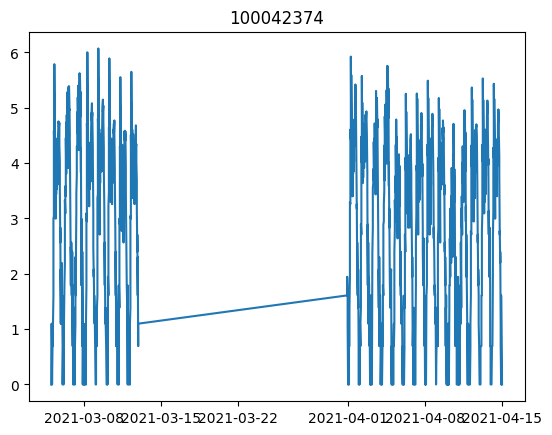

In [93]:
mask = (X['site_id'] == 100042374) & (X['date'] >= start_date) & (X['date'] <= end_date)

# Utiliser .loc[] pour indexer correctement les DataFrame et Series
plt.plot(X.loc[mask, 'date'], y_test_np[mask])
plt.title('100042374')
plt.show()
